In [0]:
%fs ls /FileStore/tables/500_Cities__Local_Data_for_Better_Health__2018_release.csv

path,name,size,modificationTime
dbfs:/FileStore/tables/500_Cities__Local_Data_for_Better_Health__2018_release.csv,500_Cities__Local_Data_for_Better_Health__2018_release.csv,229658323,1655910858000


In [0]:
%fs head /FileStore/tables/500_Cities__Local_Data_for_Better_Health__2018_release.csv

[Truncated to first 65536 bytes]
Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,Geolocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
2015,IN,Indiana,Fishers,City,BRFSS,Health Outcomes,1823278,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,24.2,23.7,24.7,,,76794,POINT (-85.969310702 39.9587635263),HLTHOUT,BPHIGH,1823278,,High Blood Pressure
2015,CA,California,Milpitas,City,BRFSS,Health Outcomes,0647766,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,22.2,21.9,22.5,,,66790,POINT (-121.892083025 37.433869763),HLTHOUT,BPHIGH,647766,,High Blood Pressure
2015,CT,Connecticut,Stamford,City,BRFSS,Health Outcomes,0973000,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,26,25.8,26.2,,,122643,POINT (-73.5589363142 41.1049145013),HLTHOUT,BPHIGH,973000,,High Blood Pressure
2015,CA,California,Elk Grove,City,BRFSS,Health Outcomes,0622020,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,27.7,27.5,27.8,,,153015,POINT (-121.384137762 38.4159992006),HLTHOUT,BPHIGH,622020,,High Blood Pressure
2015,FL,Florida,Palm Bay,City,BRFSS,Prevention,1254000,Cholesterol screening among adults aged >=18 Years,%,CrdPrv,Crude prevalence,78,77.5,78.4,,,103190,POINT (-80.6666722846 27.9838255249),PREVENT,CHOLSCREEN,1254000,,Cholesterol Screening
2015,TX,Texas,Houston,City,BRFSS,Health Outcomes,4835000,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,30.4,30.4,30.5,,,2099451,POINT (-95.3860033966 29.7806691396),HLTHOUT,BPHIGH,4835000,,High Blood Pressure
2016,IL,Illinois,Chicago,Census Tract,BRFSS,Health Outcomes,1714000-17031190601,Arthritis among adults aged >=18 Years,%,CrdPrv,Crude prevalence,17.5,16.7,18.4,,,4545,POINT (-87.7804606071 41.9274146184),HLTHOUT,ARTHRITIS,1714000,17031190601,Arthritis
2015,TX,Texas,Pasadena,Census Tract,BRFSS,Health Outcomes,4856000-48201323500,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,26.6,25.9,27.2,,,5377,POINT (-95.2017945161 29.6634268627),HLTHOUT,BPHIGH,4856000,48201323500,High Blood Pressure
2016,AL,Alabama,Birmingham,Census Tract,BRFSS,Health Outcomes,0107000-01073012703,Arthritis among adults aged >=18 Years,%,CrdPrv,Crude prevalence,13.5,12.6,14.4,,,498,POINT (-86.6671888213 33.4681180943),HLTHOUT,ARTHRITIS,107000,1073012703,Arthritis
2016,FL,Florida,Tampa,Census Tract,BRFSS,Health Outcomes,1271000-12057000101,Stroke among adults aged >=18 Years,%,CrdPrv,Crude prevalence,1.9,1.8,2,,,4308,POINT (-82.4118783581 28.0490072429),HLTHOUT,STROKE,1271000,12057000101,Stroke
2016,IN,Indiana,Evansville,Census Tract,BRFSS,Unhealthy Behaviors,1822000-18163002300,Obesity among adults aged >=18 Years,%,CrdPrv,Crude prevalence,41.6,40,43.2,,,2575,POINT (-87.5504740243 37.989830911),UNHBEH,OBESITY,1822000,18163002300,Obesity
2015,CA,California,Fontana,Census Tract,BRFSS,Health Outcomes,0624680-06071002402,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,24.7,23.6,25.8,,,4460,POINT (-117.457184279 34.0950789948),HLTHOUT,BPHIGH,624680,6071002402,High Blood Pressure
2015,IL,Illinois,Chicago,Census Tract,BRFSS,Health Outcomes,1714000-17031837100,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,44.6,43.3,45.9,,,1819,POINT (-87.6987209657 41.8856736633),HLTHOUT,BPHIGH,1714000,17031837100,High Blood Pressure
2016,TX,Texas,Fort Worth,Census Tract,BRFSS,Prevention,4827000-48439123400,Mammography use among women aged 50–74 Years,%,CrdPrv,Crude prevalence,78.3,75.4,81,,,2025,POINT (-97.3379439687 32.7353683546),PREVENT,MAMMOUSE,4827000,48439123400,Mammography
2016,WA,Washington,Seattle,Census Tract,BRFSS,Unhealthy Behaviors,5363000-53033000600,Obesity among adults aged >=18 Years,%,CrdPrv,Crude prevalence,22.9,22.3,2

In [0]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

cities_health = "/FileStore/tables/500_Cities__Local_Data_for_Better_Health__2018_release.csv"

In [0]:
# Define Schema
cities_schema = StructType([StructField("Year", IntegerType(),True),
     StructField("StateAbbr", StringType(), True),
     StructField("StateDesc", StringType(), True),
     StructField("CityName", StringType(), True),
     StructField("GeographicLevel", StringType(),True),
     StructField("DataSource", StringType(),True),
     StructField("Category", StringType(), True),
     StructField("UniqueID", StringType(), True),                      
     StructField("Measure", StringType(), True),                     
     StructField("Data_Value_Unit", IntegerType(), True),
     StructField("DataValueTypeID", IntegerType(), True),
     StructField("Data_Value_Type", StringType(), True),
     StructField("Data_Value", FloatType(), True),                      
     StructField("Low_Confidence_Limit", FloatType(), True),
     StructField("High_Confidence_Limit", LongType(), True),
     StructField("Data_Value_Footnote_Symbol", StringType(),True),
     StructField("Data_Value_Footnote", StringType(), True),
     StructField("PopulationCount", IntegerType(), True),
     StructField("Geolocation", StringType(), True), 
     StructField("CategoryID", StringType(), True),
     StructField("MeasureId", StringType(), True),
     StructField("CityFIPS", StringType(), True),
     StructField("TractFIPS", StringType(), True),                      
     StructField("Short_Question_Text", StringType(), True)])

In [0]:
cities_df = spark.read.csv(cities_health, header=True, schema=cities_schema)

In [0]:
cities_df.cache()

Out[4]: DataFrame[Year: int, StateAbbr: string, StateDesc: string, CityName: string, GeographicLevel: string, DataSource: string, Category: string, UniqueID: string, Measure: string, Data_Value_Unit: int, DataValueTypeID: int, Data_Value_Type: string, Data_Value: float, Low_Confidence_Limit: float, High_Confidence_Limit: bigint, Data_Value_Footnote_Symbol: string, Data_Value_Footnote: string, PopulationCount: int, Geolocation: string, CategoryID: string, MeasureId: string, CityFIPS: string, TractFIPS: string, Short_Question_Text: string]

#####  the number of times health outcomes, prevention and unhealthy behaviors occured based on category id in descending order

In [0]:
cities_df.groupby('CategoryID').count().orderBy('count', ascending=False).show()

+----------+------+
|CategoryID| count|
+----------+------+
|   HLTHOUT|376673|
|   PREVENT|288400|
|    UNHBEH|145030|
+----------+------+



#####  the number of occurences of the different measures of health occured based on Measure id in ascending order

In [0]:
cities_df.groupby('MeasureID').count().orderBy('count', ascending=True).show(50)

+------------+-----+
|   MeasureID|count|
+------------+-----+
|       COREW|28453|
|       COREM|28464|
|   TEETHLOST|28601|
|    MAMMOUSE|28727|
|COLON_SCREEN|28847|
|     PAPTEST|28912|
|     ACCESS2|28973|
|       SLEEP|29006|
|    HIGHCHOL|29006|
|      CANCER|29006|
|    DIABETES|29006|
|  CHOLSCREEN|29006|
|       BPMED|29006|
|      BPHIGH|29006|
|         CHD|29006|
|    CSMOKING|29006|
|   ARTHRITIS|29006|
|        COPD|29006|
|      DENTAL|29006|
|       BINGE|29006|
|         LPA|29006|
|     OBESITY|29006|
|       MHLTH|29006|
|      KIDNEY|29006|
|     CASTHMA|29006|
|       PHLTH|29006|
|     CHECKUP|29006|
|      STROKE|29006|
+------------+-----+



In [0]:
import pandas as pd

In [0]:
cities_df.createOrReplaceTempView("Viewone")

#####  The reasons behind unhealthy behaviors for people among 18+ age

In [0]:
unbehav = spark.sql("select distinct Measure from Viewone where category = 'Unhealthy Behaviors'")
pd.set_option('display.max_colwidth',200)
unbehav.limit(10).toPandas()

,Measure
0,Current smoking among adults aged >=18 Years
1,Binge drinking among adults aged >=18 Years
2,Sleeping less than 7 hours among adults aged >=18 Years
3,Obesity among adults aged >=18 Years
4,No leisure-time physical activity among adults aged >=18 Years


#####  The reasons for which people are taking medications

In [0]:
medication = spark.sql("select distinct Measure,CityName,Data_Value from Viewone where Category = 'Health Outcomes'")
medication.limit(110).toPandas()

,Measure,CityName,Data_Value
0,Stroke among adults aged >=18 Years,Seattle,3.300000
1,High blood pressure among adults aged >=18 Years,Chicago,44.599998
2,Stroke among adults aged >=18 Years,Bridgeport,4.300000
3,High blood pressure among adults aged >=18 Years,Minneapolis,22.700001
4,High blood pressure among adults aged >=18 Years,Tucson,31.100000
...,...,...,...
105,High blood pressure among adults aged >=18 Years,Richmond,52.200001
106,Diagnosed diabetes among adults aged >=18 Years,Lubbock,9.600000
107,High blood pressure among adults aged >=18 Years,Phoenix,26.000000
108,All teeth lost among adults aged >=65 Years,Yuma,37.299999


##### Let us explore the data for New york for year 2016

In [0]:
NY_state = spark.sql("select Year,StateAbbr,StateDesc,GeographicLevel,CityName,Data_Value,Category,Measure,PopulationCount,MeasureId,CategoryID from Viewone where StateAbbr = 'NY' and Year = '2016'")
NY_state.limit(5).toPandas()

,Year,StateAbbr,StateDesc,GeographicLevel,CityName,Data_Value,Category,Measure,PopulationCount,MeasureId,CategoryID
0,2016,NY,New York,Census Tract,New York,3.100000,Health Outcomes,Stroke among adults aged >=18 Years,4413,STROKE,HLTHOUT
1,2016,NY,New York,Census Tract,New York,20.799999,Unhealthy Behaviors,Obesity among adults aged >=18 Years,3021,OBESITY,UNHBEH
2,2016,NY,New York,Census Tract,New York,3.700000,Health Outcomes,Stroke among adults aged >=18 Years,8463,STROKE,HLTHOUT
3,2016,NY,New York,Census Tract,New York,36.599998,Unhealthy Behaviors,Obesity among adults aged >=18 Years,5047,OBESITY,UNHBEH
4,2016,NY,New York,Census Tract,New York,16.299999,Health Outcomes,All teeth lost among adults aged >=65 Years,6447,TEETHLOST,HLTHOUT


In [0]:
NY_state.createOrReplaceTempView("NYS")

##### To see the list of cities of New york state from which data has been collected

In [0]:
NYS1= spark.sql("select distinct CityName from NYS")
NYS1.limit(20).toPandas()

,CityName
0,Albany
1,Rochester
2,Yonkers
3,Schenectady
4,Buffalo
5,Syracuse
6,New York
7,New Rochelle
8,Mount Vernon


##### To see the cities with adults who suffered heart stroke

In [0]:
NYS2= spark.sql("select CityName,Measure,Data_Value from NYS where Measure = 'Stroke among adults aged >=18 Years' and GeographicLevel = 'City' order by Data_Value desc")
NYS2.limit(20).toPandas()

,CityName,Measure,Data_Value
0,Rochester,Stroke among adults aged >=18 Years,4.6
1,Buffalo,Stroke among adults aged >=18 Years,4.4
2,Syracuse,Stroke among adults aged >=18 Years,4.3
3,Buffalo,Stroke among adults aged >=18 Years,4.2
4,Rochester,Stroke among adults aged >=18 Years,4.0
5,Mount Vernon,Stroke among adults aged >=18 Years,3.9
6,Syracuse,Stroke among adults aged >=18 Years,3.8
7,Mount Vernon,Stroke among adults aged >=18 Years,3.7
8,Schenectady,Stroke among adults aged >=18 Years,3.6
9,Albany,Stroke among adults aged >=18 Years,3.5


In [0]:
import matplotlib
from matplotlib import pyplot as plt
from pandas import DataFrame

In [0]:
data1 = NYS2.limit(20).toPandas()

##### To see the cities with adults who suffer diabetes

In [0]:
NYS3= spark.sql("select CityName,Measure,Data_Value from NYS where Measure = 'Diagnosed diabetes among adults aged >=18 Years' and GeographicLevel = 'City' order by Data_Value desc")
NYS3.limit(20).toPandas()
data2 = NYS3.limit(20).toPandas()
data2

,CityName,Measure,Data_Value
0,Buffalo,Diagnosed diabetes among adults aged >=18 Years,13.9
1,Syracuse,Diagnosed diabetes among adults aged >=18 Years,13.8
2,Rochester,Diagnosed diabetes among adults aged >=18 Years,13.7
3,Buffalo,Diagnosed diabetes among adults aged >=18 Years,13.3
4,Mount Vernon,Diagnosed diabetes among adults aged >=18 Years,12.9
5,Mount Vernon,Diagnosed diabetes among adults aged >=18 Years,12.1
6,Syracuse,Diagnosed diabetes among adults aged >=18 Years,12.0
7,Rochester,Diagnosed diabetes among adults aged >=18 Years,12.0
8,New York,Diagnosed diabetes among adults aged >=18 Years,11.6
9,Schenectady,Diagnosed diabetes among adults aged >=18 Years,11.5


Out[18]: <AxesSubplot:title={'center':'Health Outcomes: Diabetes - Adults'}, xlabel='CityName'>

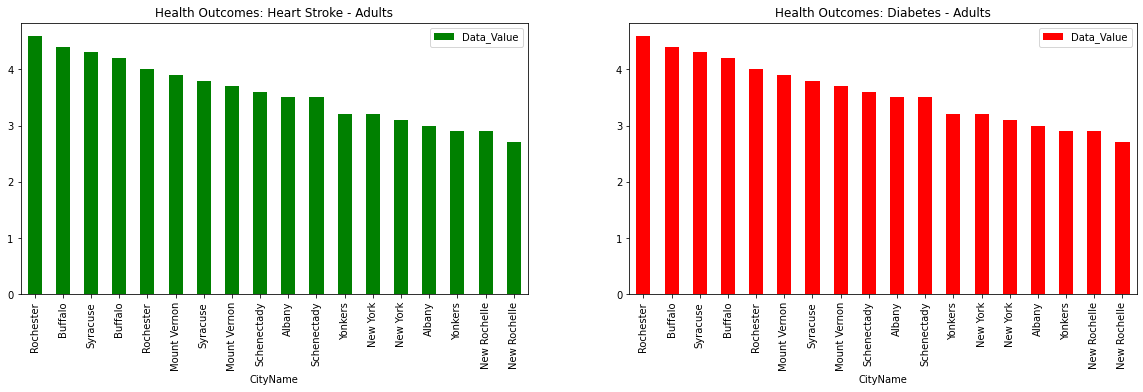

In [0]:
fig1, ax2 = plt.subplots(ncols=2, figsize=(10,5))
data1.plot.bar(title = 'Health Outcomes: Heart Stroke - Adults', x = 'CityName', y = 'Data_Value', figsize=(20,5), color = 'green', ax= ax2[0])
data1.plot.bar(title = 'Health Outcomes: Diabetes - Adults', x = 'CityName', y = 'Data_Value', figsize=(20,5), color = 'red', ax= ax2[1])

##### To see the cities with adults who suffer from Binge Drinking

In [0]:
NYS4= spark.sql("select CityName,Measure,Data_Value from NYS where Measure = 'Binge drinking among adults aged >=18 Years' and GeographicLevel = 'City' order by Data_Value desc")
NYS4.limit(20).toPandas()
data3 = NYS4.limit(20).toPandas()
data3

,CityName,Measure,Data_Value
0,New Rochelle,Binge drinking among adults aged >=18 Years,18.900000
1,Schenectady,Binge drinking among adults aged >=18 Years,18.900000
2,New York,Binge drinking among adults aged >=18 Years,18.900000
3,New York,Binge drinking among adults aged >=18 Years,18.500000
4,Buffalo,Binge drinking among adults aged >=18 Years,18.500000
5,Albany,Binge drinking among adults aged >=18 Years,18.500000
6,Schenectady,Binge drinking among adults aged >=18 Years,18.400000
7,Syracuse,Binge drinking among adults aged >=18 Years,18.400000
8,New Rochelle,Binge drinking among adults aged >=18 Years,18.000000
9,Buffalo,Binge drinking among adults aged >=18 Years,18.000000


##### To see the cities with adults who sleep less that 7 hours

In [0]:
NYS5= spark.sql("select CityName,Measure,Data_Value,Category from NYS where Measure = 'Sleeping less than 7 hours among adults aged >=18 Years' and GeographicLevel = 'City' and Category = 'Unhealthy Behaviors' and CityName in ('Buffalo','Mount Vernon','New York') order by Data_Value desc")
NYS5.limit(20).toPandas()
data4 = NYS5.limit(30).toPandas()
data4

,CityName,Measure,Data_Value,Category
0,Buffalo,Sleeping less than 7 hours among adults aged >=18 Years,42.700001,Unhealthy Behaviors
1,Buffalo,Sleeping less than 7 hours among adults aged >=18 Years,42.400002,Unhealthy Behaviors
2,Mount Vernon,Sleeping less than 7 hours among adults aged >=18 Years,41.299999,Unhealthy Behaviors
3,Mount Vernon,Sleeping less than 7 hours among adults aged >=18 Years,41.099998,Unhealthy Behaviors
4,New York,Sleeping less than 7 hours among adults aged >=18 Years,39.900002,Unhealthy Behaviors
5,New York,Sleeping less than 7 hours among adults aged >=18 Years,39.799999,Unhealthy Behaviors


Out[21]: <AxesSubplot:title={'center':'Unhealthy Behaviors: Sleeping less - Adults'}, xlabel='CityName'>

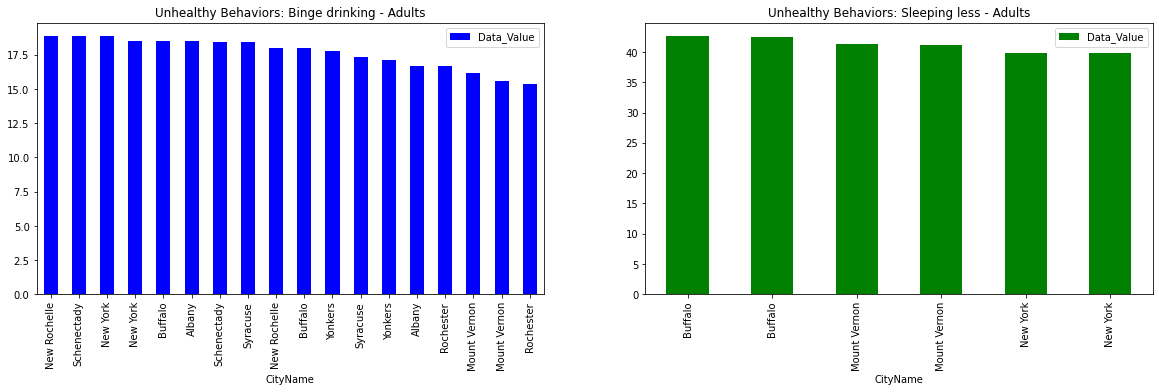

In [0]:
fig1, ax2 = plt.subplots(ncols=2, figsize=(10,5))
data3.plot.bar(title = 'Unhealthy Behaviors: Binge drinking - Adults', x = 'CityName', y = 'Data_Value', figsize=(20,5), color = 'blue', ax= ax2[0])
data4.plot.bar(title = 'Unhealthy Behaviors: Sleeping less - Adults', x = 'CityName', y = 'Data_Value', figsize=(20,5), color = 'green', ax= ax2[1])

In [0]:
CA_state = spark.sql("select Year,StateAbbr,StateDesc,GeographicLevel,CityName,Data_Value,Category,Measure,PopulationCount,MeasureId,CategoryID from Viewone where StateAbbr = 'CA' and Year = '2016'")
CA_state.limit(5).toPandas()

,Year,StateAbbr,StateDesc,GeographicLevel,CityName,Data_Value,Category,Measure,PopulationCount,MeasureId,CategoryID
0,2016,CA,California,City,Lancaster,10.400000,Health Outcomes,Diagnosed diabetes among adults aged >=18 Years,156633,DIABETES,HLTHOUT
1,2016,CA,California,Census Tract,Citrus Heights,3.400000,Health Outcomes,Stroke among adults aged >=18 Years,3323,STROKE,HLTHOUT
2,2016,CA,California,Census Tract,Compton,34.900002,Unhealthy Behaviors,Obesity among adults aged >=18 Years,452,OBESITY,UNHBEH
3,2016,CA,California,Census Tract,Santa Ana,20.600000,Unhealthy Behaviors,Obesity among adults aged >=18 Years,2018,OBESITY,UNHBEH
4,2016,CA,California,Census Tract,Oakland,19.900000,Unhealthy Behaviors,Obesity among adults aged >=18 Years,3136,OBESITY,UNHBEH
